In [1]:
import random
import handcalcs.render
import math
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import hypergeom
from matplotlib.pyplot import cm
import numpy as np
plt.style.use('dark_background')

In [2]:
def forecast(y_new, x_1, y_1, x_2, y_2):
    x_new = ((x_2 - x_1) / (y_2 - y_1))*(y_new - y_1) + x_1
    return x_new, y_new

In [3]:
def producers_risk(alpha, dict_result):
    alpha = 0.05
    P_a = 1 - alpha
    adj_Pa_hi = 999
    adj_Pa_lo = 0
    Pa_hi = []
    Pa_lo = []
    for i in dict_result.keys():
        # print("i:", dict_result[i])
        if dict_result[i] > P_a and dict_result[i] < adj_Pa_hi:
            adj_Pa_hi = dict_result[i]
            Pa_hi = [i, adj_Pa_hi]
        elif dict_result[i] < P_a and dict_result[i] > adj_Pa_lo:
            adj_Pa_lo = dict_result[i]
            Pa_lo = [i, adj_Pa_lo]
        else:
            pass
    print("PRODUCER'S RISK", Pa_lo, Pa_hi)

    # defective_mid = (Pa_hi[0] + Pa_lo[0]) / 2
    # print(defective_mid)
    prod_risk_pct_defect, prod_risk_P_a = forecast(P_a, Pa_hi[0], Pa_hi[1], Pa_lo[0], Pa_lo[1])
    print("PRODUCER'S RISK P_a={} at percent defective = {}%\n".format(round(prod_risk_P_a, 4), round(prod_risk_pct_defect*100, 4)))

In [4]:
def consumers_risk(beta, dict_result):
    beta = 0.1
    P_a = beta
    adj_Pa_hi = 999
    adj_Pa_lo = 0
    Pa_hi = []
    Pa_lo = []
    for i in dict_result.keys():
        # print("i:", dict_result[i])
        if dict_result[i] > P_a and dict_result[i] < adj_Pa_hi:
            adj_Pa_hi = dict_result[i]
            Pa_hi = [i, adj_Pa_hi]
        elif dict_result[i] < P_a and dict_result[i] > adj_Pa_lo:
            adj_Pa_lo = dict_result[i]
            Pa_lo = [i, adj_Pa_lo]
        else:
            pass
    print("CONSUMER'S RISK", Pa_lo, Pa_hi)

    # defective_mid = (Pa_hi[0] + Pa_lo[0]) / 2
    # print(defective_mid)
    prod_risk_pct_defect, prod_risk_P_a = forecast(P_a, Pa_hi[0], Pa_hi[1], Pa_lo[0], Pa_lo[1])
    print("CONSUMER'S RISK P_a={} at percent defective = {}%\n".format(round(prod_risk_P_a, 4), round(prod_risk_pct_defect*100, 4)))

In [5]:
# # N = jumlah populasi
# # n = jumlah sample dari lot
# # k = jumlah defects bisa diterima

# # HYPERGEOM

# list_sampling_plan = [[50,13,0]] # [N, n, k]

# list_collection = []
# list_legend = []
# # dict_result = {}
# # color = iter(cm.rainbow(np.linspace(0, 1, n)))
# # color_list = ['r', 'g', 'b', 'y', 'grey']
# color_list = ['grey']
# color_iter = iter(color_list)

# for i in list_sampling_plan:
#     dict_result = {}
#     N = i[0]
#     k = i[2]
#     n = i[1]
#     for K_ in range(N):
#         K = K_
#         dict_result[K/N] = round(hypergeom.cdf(k, N, K, n),4) # hypergeom.cdf(k, N, K, n)
#     key_max = max(dict_result, key=dict_result.get)
#     value_max = max(dict_result.values())

#     # print(dict_result)

#     # PRODUCER'S RISK
#     alpha = 0.05
#     P_a = 1 - alpha
#     adj_Pa_hi = 999
#     adj_def_hi = 0
#     adj_Pa_lo = 0
#     adj_def_hi = 1
#     Pa_hi = []
#     Pa_lo = []
#     for i in dict_result.keys():
#         # print("i:", dict_result[i])
#         if dict_result[i] > P_a and dict_result[i] < adj_Pa_hi:
#             adj_Pa_hi = dict_result[i]
#             Pa_hi = [i, adj_Pa_hi]
#         elif dict_result[i] < P_a and dict_result[i] > adj_Pa_lo:
#             adj_Pa_lo = dict_result[i]
#             Pa_lo = [i, adj_Pa_lo]
#         else:
#             pass
#     print("PRODUCER'S RISK", Pa_lo, Pa_hi)

#     # defective_mid = (Pa_hi[0] + Pa_lo[0]) / 2
#     # print(defective_mid)
#     prod_risk_pct_defect, prod_risk_P_a = forecast(P_a, Pa_hi[0], Pa_hi[1], Pa_lo[0], Pa_lo[1])
#     print("PRODUCER'S RISK P_a={} at percent defective = {}%\n".format(prod_risk_P_a, round(prod_risk_pct_defect*100,4)))

#     # CONSUMER'S RISK
#     beta = 0.1
#     P_a = beta
#     adj_Pa_hi = 999
#     adj_def_hi = 0
#     adj_Pa_lo = 0
#     adj_def_hi = 1
#     Pa_hi = []
#     Pa_lo = []
#     for i in dict_result.keys():
#         # print("i:", dict_result[i])
#         if dict_result[i] > P_a and dict_result[i] < adj_Pa_hi:
#             adj_Pa_hi = dict_result[i]
#             Pa_hi = [i, adj_Pa_hi]
#         elif dict_result[i] < P_a and dict_result[i] > adj_Pa_lo:
#             adj_Pa_lo = dict_result[i]
#             Pa_lo = [i, adj_Pa_lo]
#         else:
#             pass
#     print("CONSUMER'S RISK", Pa_lo, Pa_hi)
#     prod_risk_pct_defect, prod_risk_P_a = forecast(P_a, Pa_hi[0], Pa_hi[1], Pa_lo[0], Pa_lo[1])
#     print("CONSUMER'S RISK P_a={} at percent defective = {}%\n".format(prod_risk_P_a, round(prod_risk_pct_defect*100,4)))

#     # defective_mid = (Pa_hi[0] + Pa_lo[0]) / 2
#     # print(defective_mid)
#     # prod_risk_pct_defect, prod_risk_P_a = forecast(P_a, Pa_hi[0], Pa_hi[1], Pa_lo[0], Pa_lo[1])
#     col = next(color_iter)
#     plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
#     list_legend.append('N={}, n={}, k={}'.format(N, n, k))
  
# plt.legend(list_legend)
# plt.ylabel('Probability of Accepting The Lot, Pa')
# plt.xlabel('Lot Defect Rate, Pd')
# plt.title('hypergeom scipy CDF')



PRODUCER'S RISK [0.02702702702702703, 0.7838] [0.0, 1.0]
PRODUCER'S RISK P_a=0.95 at percent defective = 0.625%

CONSUMER'S RISK [0.24324324324324326, 0.0805] [0.21621621621621623, 0.1112]
CONSUMER'S RISK P_a=0.1 at percent defective = 22.6076%



Text(0.5, 1.0, 'hypergeom scipy CDF')

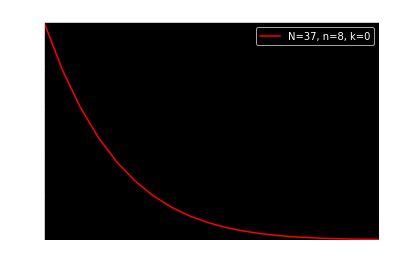

In [6]:
# N = jumlah populasi
# n = jumlah sample dari lot
# k = jumlah defects bisa diterima

# HYPERGEOM

list_sampling_plan = [[37,8,0]] # [N, n, k]

list_collection = []
list_legend = []
# dict_result = {}
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
# color_list = ['r', 'g', 'b', 'y', 'grey']
color_list = ['r']
color_iter = iter(color_list)

for i in list_sampling_plan:
    dict_result = {}
    N = i[0]
    k = i[2]
    n = i[1]
    for K_ in range(N):
        K = K_
        dict_result[K/N] = round(hypergeom.cdf(k, N, K, n),4) # hypergeom.cdf(k, N, K, n)
    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())

    # print(dict_result)

    # PRODUCER'S RISK
    alpha = 0.05
    producers_risk(alpha, dict_result)


    # CONSUMER'S RISK
    beta = 0.1
    consumers_risk(beta, dict_result)
    
    
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
    list_legend.append('N={}, n={}, k={}'.format(N, n, k))
  
plt.legend(list_legend)
plt.xlim([0,0.5])
plt.ylim([0,1])
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('hypergeom scipy CDF')